## Analysis of Epinions Dataset Part 2

The goal of the second analysis task is to train linear regression models to predict users' ratings towards items. This involves a standard Data Science workflow: exploring data, building models, making predictions, and evaluating results. In this task, we will explore the impacts of feature selections and different sizes of training/testing data on the model performance. We will use another cleaned Epinions sub-dataset that is different from the one in Analysis of Epinions Data task 1. 

### Import Cleaned Epinions Dataset
The csv file named 'Epinions_cleaned_data_portfolio2.csv'is provided. You may need to use the Pandas method, i.e., `to_csv`, for doing this. After that, please import the csv file (i.e., 'Epinions_cleaned_data_portfolio2') and print out its total length.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score

import seaborn as sns
import matplotlib.pylab as plt
%matplotlib inline

### Explore the Dataset

* Use the methods, i.e., `head()` and `info()`, to have a rough picture about the data, e.g., how many columns, and the data types of each column. 
* As our goal is to predict ratings given other columns, please get the correlations between helpfulness/gender/category/review and rating by using the `corr()` method.
* To get the correlations between different features, you may need to first convert the categorical features (i.e., gender, category and review) into numerial values. For doing this, you may need to import `OrdinalEncoder` from `sklearn.preprocessing` (refer to the useful exmaples [here](https://pbpython.com/categorical-encoding.html))
* Please provide ___necessary explanations/analysis___ on the correlations, and figure out which are the ___most___ and ___least___ corrleated features regarding rating. Try to ___discuss___ how the correlation will affect the final prediction results, if we use these features to train a regression model for rating prediction. In what follows, we will conduct experiments to verify your hypothesis.

In [2]:
df = pd.read_csv('Epinions_cleaned_data_portfolio_2.csv')
print(len(df))

2899


In [4]:
df.head()

,userId,timestamp,review,item,rating,helpfulness,gender,category
0,4259,11900,"Finally, Something for (Relatively) Nothing",MyPoints.com,4.0,4.0,F,Online Stores & Services
1,4259,12000,Shocking!,Sixth Sense,5.0,4.0,F,Movies
2,4259,12000,Simply Shaggadelic!,Austin Powers: The Spy Who Shagged Me,5.0,4.0,F,Movies
3,4259,12000,Better Than The First!,Toy Story 2,5.0,3.0,F,Movies
4,4259,12000,Blair Witch made me appreciate this,Star Wars Episode I: The Phantom Menace,2.0,4.0,F,Movies


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2899 entries, 0 to 2898
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   userId       2899 non-null   int64  
 1   timestamp    2899 non-null   int64  
 2   review       2899 non-null   object 
 3   item         2899 non-null   object 
 4   rating       2899 non-null   float64
 5   helpfulness  2899 non-null   float64
 6   gender       2899 non-null   object 
 7   category     2899 non-null   object 
dtypes: float64(2), int64(2), object(4)
memory usage: 181.3+ KB


### Remark
- OrdinalEncoder is used to encode categorical features as an integer array
- For simplicity, here we assume a dummy order of these categorical values
- You can use any other possible solutions to convert the categorical features as an integer array

In [2]:
from sklearn.preprocessing import OrdinalEncoder

# convert categorical values into numerial values, e.g., category -> category_code
#ord_enc = OrdinalEncoder(dtype=int)
ord_enc=OrdinalEncoder(dtype=int)
#print(df.columns.tolist())

df["category_code"] = ord_enc.fit_transform(df[["category"]])
df["gender_code"] = ord_enc.fit_transform(df[["gender"]])
df["review_code"] = ord_enc.fit_transform(df[["review"]])

#print(df.columns.tolist())

#print(df.columns.tolist())


#df[['category_code', 'gender_code', 'review_code']] = ord_enc.fit_transform(df[['category', 'gender', 'review']])
#df[["category_code"]]=ord_enc.fit_transform(df[["category"]])                                                                           
                                                                            
# df[["category", "category_code", "review", "review_code", "gender", "gender_code"]].head(11)

NameError: name 'df' is not defined

In [7]:
df.head()

,userId,timestamp,review,item,rating,helpfulness,gender,category,category_code,gender_code,review_code
0,4259,11900,"Finally, Something for (Relatively) Nothing",MyPoints.com,4.0,4.0,F,Online Stores & Services,6,0,856
1,4259,12000,Shocking!,Sixth Sense,5.0,4.0,F,Movies,5,0,1985
2,4259,12000,Simply Shaggadelic!,Austin Powers: The Spy Who Shagged Me,5.0,4.0,F,Movies,5,0,2006
3,4259,12000,Better Than The First!,Toy Story 2,5.0,3.0,F,Movies,5,0,472
4,4259,12000,Blair Witch made me appreciate this,Star Wars Episode I: The Phantom Menace,2.0,4.0,F,Movies,5,0,493


In [8]:
# get the correlations between helpfulness/category/gender/review and rating
corr_helpfulness = df['helpfulness'].corr(df['rating']) 
corr_category = df['category_code'].corr(df['rating'])
corr_gender = df['gender_code'].corr(df['rating'])
corr_review = df['review_code'].corr(df['rating'])

print('corr_helpfulness: ', corr_helpfulness)
print('corr_category: ', corr_category)
print('corr_gender: ', corr_gender)
print('corr_review: ', corr_review)

corr_helpfulness:  -0.016832209821488576
corr_category:  -0.14057638180137588
corr_gender:  0.018105039011507625
corr_review:  -0.062071079458250904


From the results, we may get several observations/conclusions:
* rating is relatively more correlated with the item category and item review.
* raing is relatively less corrlelated with the rating helpfulness and user gender. 
* overall, rating is not highly correlated with the four features, as the correlation values are quite small. Therefore, using these features as input for rating prediction may not be quite accurate.

### Remark
- By assuming a dummy order of the categorical values, we calculate the correlation of different columns with corr()
- You may also use other possible solutions, e.g., RFE, to find out the most and least important features.
- Below shows another way to convert the categorical values into numerical values for correlation calculation. ___Although different encoding methods are used, the correlation trends are quite similar.___

In [9]:
df_another = pd.read_csv('Epinions_cleaned_data_portfolio_2.csv')
print(len(df_another))

2899


In [10]:
#convert gender to numerical values
df_another['gender'] = df_another['gender'].astype('category')
df_another['gender'] = df_another['gender'].cat.codes

#convert review to numerical values
df_another['review'] = df_another['review'].astype('category')
df_another['review'] = df_another['review'].cat.codes

#convert genre to numerical values
df_another['category'] = df_another['category'].astype('category')
df_another['category'] = df_another['category'].cat.codes

df_another.head()

,userId,timestamp,review,item,rating,helpfulness,gender,category
0,4259,11900,856,MyPoints.com,4.0,4.0,0,6
1,4259,12000,1985,Sixth Sense,5.0,4.0,0,5
2,4259,12000,2006,Austin Powers: The Spy Who Shagged Me,5.0,4.0,0,5
3,4259,12000,472,Toy Story 2,5.0,3.0,0,5
4,4259,12000,493,Star Wars Episode I: The Phantom Menace,2.0,4.0,0,5


In [11]:
#calculate the correlation between features
df_another[['helpfulness', 'gender', 'review', 'category', 'rating']].corr()

,helpfulness,gender,review,category,rating
helpfulness,1.000000,-0.046627,0.016170,-0.000189,-0.016832
gender,-0.046627,1.000000,-0.014422,-0.017644,0.018105
review,0.016170,-0.014422,1.000000,0.012047,-0.062071
category,-0.000189,-0.017644,0.012047,1.000000,-0.140576
rating,-0.016832,0.018105,-0.062071,-0.140576,1.000000


### Split Training and Testing Data
* Machine learning models are trained to help make predictions for the future. Normally, we need to randomly split the dataset into training and testing sets, where we use the training set to train the model, and then leverage the well-trained model to make predictions on the testing set. 
* To further investigate whether the size of the training/testing data affects the model performance, please random split the data into training and testing sets with different sizes:
    * Case 1: training data containing 10% of the entire data;
    * Case 2: training data containing 90% of the entire data. 
* Print the shape of training and testing sets in the two cases. 

In [12]:
# Case 1 - split train and test sets
train_case1, test_case1 = train_test_split(df, test_size=0.9, random_state=142)
print('Case 1 train shape: ', train_case1.shape)
print('Case 1 test shape: ', test_case1.shape)

# Case 2 - split train and test sets
train_case2, test_case2 = train_test_split(df, test_size=0.1, random_state=142)
print('Case 2 train shape: ', train_case2.shape)
print('Case 2 test shape: ', test_case2.shape)

Case 1 train shape:  (289, 11)
Case 1 test shape:  (2610, 11)
Case 2 train shape:  (2609, 11)
Case 2 test shape:  (290, 11)


### Train Linear Regression Models with Feature Selection under Cases 1 & 2
* When training a machine learning model for prediction, we may need to select the most important/correlated input features for more accurate results. 
* To investigate whether feature selection affects the model performance, please select two most correlated features and two least correlated features regarding rating, respectively. 
* Train four linear regression models by following the conditions:
    - (model-a) using the training/testing data in case 1 with two most correlated input features
    - (model-b) using the training/testing data in case 1 with two least correlated input features
    - (model-c) using the training/testing data in case 2 with two most correlated input features
    - (model-d) using the training/testing data in case 2 with two least correlated input features
* By doing this, we can verify the impacts of the size of traing/testing data on the model performance via comparing model-a and model-c (or model-b and model-d); meanwhile the impacts of feature selection can be validated via comparing model-a and model-b (or model-c and model-d).    

In [13]:
# Case 1 - train the model with the most correlated features
reg_M1 = linear_model.LinearRegression()
X_train_M1 = train_case1[['review_code', 'category_code']]
y_train_M1 = train_case1['rating']

X_test_M1 = test_case1[['review_code', 'category_code']]
y_test_M1 = test_case1['rating']

reg_M1.fit(X_train_M1, y_train_M1)

# Case 1 - train the model with the least correlated features
reg_L1 = linear_model.LinearRegression()
X_train_L1 = train_case1[['gender_code', 'helpfulness']]
y_train_L1 = train_case1['rating']

X_test_L1 = test_case1[['gender_code', 'helpfulness']]
y_test_L1 = test_case1['rating']

reg_L1.fit(X_train_L1, y_train_L1)

# Case 2 - train the model with the most correlated features
reg_M2 = linear_model.LinearRegression()
X_train_M2 = train_case2[['review_code', 'category_code']]
y_train_M2 = train_case2['rating']

X_test_M2 = test_case2[['review_code', 'category_code']]
y_test_M2 = test_case2['rating']

reg_M2.fit(X_train_M2, y_train_M2)

# Case 2 - train the model with the least correlated features
reg_L2 = linear_model.LinearRegression()
X_train_L2 = train_case2[['gender_code', 'helpfulness']]
y_train_L2 = train_case2['rating']

X_test_L2 = test_case2[['gender_code', 'helpfulness']]
y_test_L2 = test_case2['rating']

reg_L2.fit(X_train_L2, y_train_L2)

LinearRegression()

### Evaluate Models
* Evaluate the performance of the four models with two metrics, including MSE and Root MSE
* Print the results of the four models regarding the two metrics

In [14]:
# Evaluate reg_M1
predicted_M1 = reg_M1.predict(X_test_M1)
mse_M1 = ((np.array(y_test_M1)-predicted_M1)**2).sum()/len(y_test_M1)
rmse_M1 = np.sqrt(mse_M1)
print("==== Case 1 - the results for the model with most correlated features")
print("reg_M1 MSE:", mse_M1)
print("reg_M1 Root MSE:", rmse_M1)

# Evaluate reg_L1
predicted_L1 = reg_L1.predict(X_test_L1)
mse_L1 = ((np.array(y_test_L1)-predicted_L1)**2).sum()/len(y_test_L1)
rmse_L1 = np.sqrt(mse_L1)
print("==== Case 1 - the results for the model with least correlated features")
print("reg_L1 MSE:", mse_L1)
print("reg_L1 Root MSE:", rmse_L1)

# Evaluate reg_M2
predicted_M2 = reg_M2.predict(X_test_M2)
mse_M2 = ((np.array(y_test_M2)-predicted_M2)**2).sum()/len(y_test_M2)
rmse_M2 = np.sqrt(mse_M2)
print("==== Case 2 - the results for the model with most correlated features")
print("reg_M2 MSE:", mse_M2)
print("reg_M2 Root MSE:", rmse_M2)

# Evaluate reg_L2
predicted_L2 = reg_L2.predict(X_test_L2)
mse_L2 = ((np.array(y_test_L2)-predicted_L2)**2).sum()/len(y_test_L2)
rmse_L2 = np.sqrt(mse_L2)
print("==== Case 2 - the results for the model with least correlated features")
print("reg_L2 MSE:", mse_L2)
print("reg_L2 Root MSE:", rmse_L2)

==== Case 1 - the results for the model with most correlated features
reg_M1 MSE: 1.7661060021271924
reg_M1 Root MSE: 1.3289492097620557
==== Case 1 - the results for the model with least correlated features
reg_L1 MSE: 1.8142164061736321
reg_L1 Root MSE: 1.3469285081895148
==== Case 2 - the results for the model with most correlated features
reg_M2 MSE: 1.6761619414799571
reg_M2 Root MSE: 1.2946667298884131
==== Case 2 - the results for the model with least correlated features
reg_L2 MSE: 1.7684952380582883
reg_L2 Root MSE: 1.3298478251507908


### Visualize, Compare and Analyze the Results
* Visulize the results, and perform ___insightful analysis___ on the obtained results. For better visualization, you may need to carefully set the scale for the y-axis.
* Normally, the model trained with most correlated features and more training data will get better results. Do you obtain the similar observations? If not, please ___explain the possible reasons___.

<BarContainer object of 4 artists>

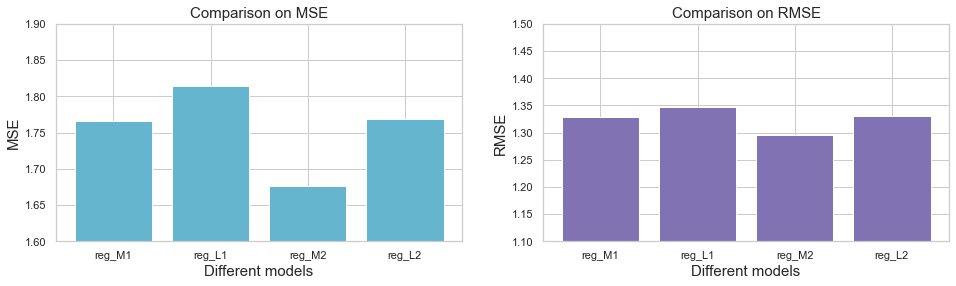

In [15]:
# create dataframe for the mse values and rmse values
mse_df = pd.DataFrame({'mse': [mse_M1, mse_L1, mse_M2, mse_L2]}, index=['reg_M1', 'reg_L1', 'reg_M2','reg_L2'])
rmse_df = pd.DataFrame({'rmse': [rmse_M1, rmse_L1, rmse_M2, rmse_L2]}, index=['reg_M1', 'reg_L1', 'reg_M2','reg_L2'])

# plot figures to show the mse and rmse results of different cases
sns.set(style="whitegrid")
plt.figure(figsize=(16,4))
plt.subplot(1, 2, 1)
plt.ylim(1.6,1.9)
plt.xlabel('Different models', size=15)
plt.ylabel('MSE', size=15)
plt.title("Comparison on MSE", size=15)
plt.bar(data=mse_df, height='mse', x=['reg_M1', 'reg_L1', 'reg_M2','reg_L2'], color='c')
plt.subplot(1, 2, 2)
plt.ylim(1.1,1.5)
plt.xlabel('Different models', size=15)
plt.ylabel('RMSE', size=15)
plt.title("Comparison on RMSE", size=15)
plt.bar(data=rmse_df, height='rmse', x=['reg_M1', 'reg_L1', 'reg_M2','reg_L2'], color='m')

The following observations and conclusions can be made:
* reg_M1 > reg_M2 and reg_L1 > reg_L2 indicates that more training data leads to better prediction
* reg_M1 < reg_L1 and reg_M2 < reg_L2 indicates that more correlated input features help generate better results
* The minor variation on the performance with different settings indicates that the models are not well trained with these input features. In other words, these input features cannot well help predict ratings.    

### Remark
- The solution just provides rough directions for the problem solving. 
- Especially for the visualization part, ___it is just the basic and plain visualization. This cannot guarantee a full mark.___
- Since the correlation between the features (e.g., helpfulness, gender, category, review) and rating is generally quite small, the results may not be consistent with the solution, e.g., reg_M1 > reg_M2 and reg_L1 > reg_L2. This would be fine and you will not get any penalty, as long as you can provide reasonable explanations.